In [245]:
from autobounds.causalProblem import causalProblem
from autobounds.DAG import DAG

from causalgraphicalmodels import StructuralCausalModel
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [246]:
raw_data = pd.read_csv("raw_iv_synth.csv", nrows=100)


In [247]:
raw_data.head()


,Z,X,Y
0,1,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


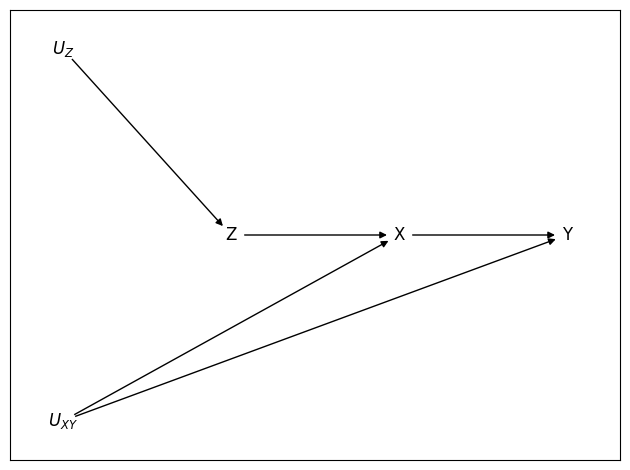

In [248]:
dag_just = DAG()
dag_just.from_structure(edges="Uz -> Z, Z -> X, X -> Y, Uxy -> X, Uxy -> Y", unob = "Uz, Uxy")
dag_just.plot()

In [249]:
# check structure of data frame
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Z       100 non-null    int64
 1   X       100 non-null    int64
 2   Y       100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


In [250]:
# group individuals into strata
dat = pd.DataFrame(raw_data.groupby(['Z', 'X', 'Y']).value_counts().reset_index()) 
dat['prob'] = dat['count'] / dat['count'].sum()
dat = dat.drop(columns='count', axis=0)
dat

,Z,X,Y,prob
0,0,0,0,0.07
1,0,1,0,0.39
2,0,1,1,0.11
3,1,0,0,0.05
4,1,0,1,0.27
5,1,1,0,0.04
6,1,1,1,0.07


In [251]:
problem = causalProblem(dag_just)
problem.load_data(dat)

In [252]:
problem.add_prob_constraints()


In [253]:
problem.set_ate(ind="X", dep="Y")

In [254]:
prog_ate = problem.write_program()


# run optimisation routine, argument saves results at filename
prog_ate_optim = prog_ate.run_scip('replication_files/results/iv_ate_cautious.csv')

print("==============================================")
print(f"Causal effect lies in the interval [{np.round(prog_ate_optim[0]['dual'], 3)}, "
      f"{np.round(prog_ate_optim[1]['dual'], 3)}]" 
)

[('Z0', 0.5700000000000001), ('Z1', 0.43000000000000005)]
LOWER BOUND: # -- Primal: -0.6842105 / Dual: -0.6842105 / Time: 0.0 ##
UPPER BOUND: # -- Primal: -0.3121175 / Dual: -0.3121175 / Time: 0.0 ##
Problem is finished! Returning final values
Problem is finished! Returning final values
CURRENT THRESHOLDS: # -- Theta: 0.37209300000000006 / Epsilon: 0.0 ##
Causal effect lies in the interval [-0.684, -0.312]
